## Basics

In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

No results found for p = (3, 200, 5, 4, 1, 1.0, 1.0, 5.0, 0.5, 0.25, 1.0)


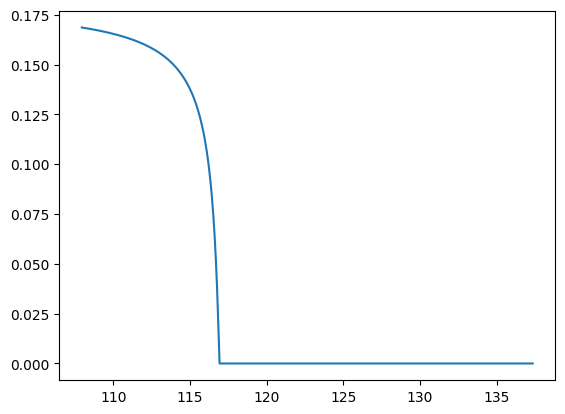

In [3]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

So the shapes are the same, it's just the domains that are quite different...
Is that the issue? That the value the worker earns at the current firm and the set of admissible promised value from OJS are v different?
Gotta dig deeper into how the search function is approximated methinks

Update 24/10/24: My intuition now is that it's indeed the v_0/sign-on wage that are the issue. Basic v_0 is both way too large and weird economically.
However, setting v_0=U has so far been problematic, somehow v_0 eclipses the entire v_grid, even the very top, so that the sign-on wage is positive.

Making the v_grid custom, aka the same as the W... didn't help at all, and also just doesn't seem like a good idea. As long as the v_0 is ok, using v_grid should be fine

In [4]:
from Multiworker_Contract_GE import MultiworkerContract
mwc_GE=MultiworkerContract(p)

J shape (3, 5, 5, 200, 1)
W shape (3, 5, 5, 200, 1, 2)
Slow kappa method
kappa 40.0
signon [  0.           0.78501312   1.57538629   2.3711561    3.17235939
   3.97903327   4.7912151    5.60894247   6.43225325   7.26118557
   8.09577781   8.93606862   9.78209691  10.63390184  11.49152287
  12.3549997   13.22437233  14.099681    14.98096624  15.86826887
  16.76162997  17.66109091  18.56669334  19.47847918  20.39649067
  21.32077031  22.2513609   23.18830552  24.13164757  25.08143073
  26.03769897  27.00049658  27.96986814  28.94585853  29.92851294
  30.91787689  31.91399618  32.91691694  33.9266856   34.94334893
  35.966954    36.99754821  38.03517928  39.07989525  40.13174451
  41.19077576  42.25703804  43.33058072  44.41145351  45.49970646
  46.59538996  47.69855475  48.80925191  49.92753288  51.05344942
  52.18705368  53.32839816  54.47753569  55.63451949  56.79940314
  57.97224057  59.15308609  60.34199438  61.5390205   62.74421987
  63.9576483   65.17936197  66.40941746  67.6478717

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 2.6624864725496513
Diff Rho: inf
Errors: 0.2755932768468763 0.018762305225939756 1
U [29.31377787]
Slow kappa method
kappa 40.0
signon [  0.           0.35017766   1.14055082   1.93632063   2.73752392
   3.54419781   4.35637963   5.174107     5.99741778   6.82635011
   7.66094235   8.50123316   9.34726144  10.19906637  11.0566874
  11.92016424  12.78953686  13.66484553  14.54613077  15.4334334
  16.3267945   17.22625544  18.13185787  19.04364372  19.9616552
  20.88593484  21.81652543  22.75347006  23.69681211  24.64659526
  25.6028635   26.56566111  27.53503267  28.51102306  29.49367748
  30.48304142  31.47916071  32.48208147  33.49185013  34.50851346
  35.53211853  36.56271274  37.60034381  38.64505978  39.69690904
  40.75594029  41.82220257  42.89574525  43.97661804  45.06487099
  46.16055449  47.26371929  48.37441645  49.49269741  50.61861395
  51.75221822  52.89356269  54.04270022  55.19968402  56.36456767
  57.5374051   58.71825062  59.90715892  61.10418503  62

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


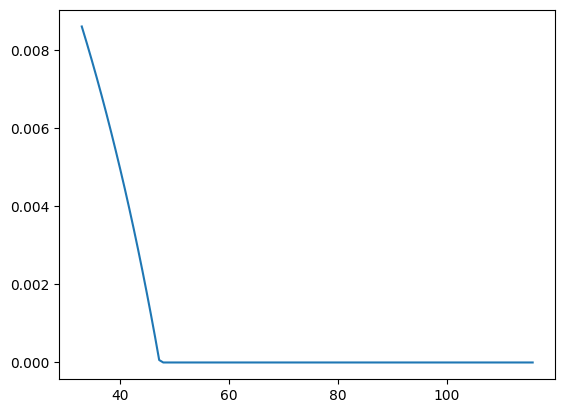

n0_star borders 0.0 2.625953332137733
Diff Rho: inf
EJinv -77.13714013505529
EJderiv -16.2421436519842
EJinv diff 1j 2s: 40.407200786060436
EJinv diff 1 sen: 2.3036284332288726
EJinv diff 2 sen: 8.88534426956473
n0_star borders 0.0 2.579519452002695
Diff Rho: inf
EJinv -48.5235794074065
EJderiv -15.612497867885587
EJinv diff 1j 2s: 13.15146191176531
EJinv diff 1 sen: 1.371465195750803
EJinv diff 2 sen: 3.5748323312489445
n0_star borders 0.0 2.487530521381486
Diff Rho: inf
EJinv -28.3636824354812
EJderiv -14.369675569522677
EJinv diff 1j 2s: 2.4636400901923095
EJinv diff 1 sen: 26.822114235413064
EJinv diff 2 sen: 3.8047468799276447
n0_star borders 0.0 2.348546902127984
Diff Rho: inf
EJinv -14.922268631667512
EJderiv -13.1266983609461
EJinv diff 1j 2s: 2.594900814050384
EJinv diff 1 sen: 10.632633845074043
EJinv diff 2 sen: 20.55501253127899
n0_star borders 0.0 2.1857480173786907
Diff Rho: inf
EJinv -6.528342253200736
EJderiv -10.969892145651208
EJinv diff 1j 2s: 3.24357235666059
EJinv 

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 1.227862048373702
Diff Rho: 0.05764625563780256
EJinv -9.682215282141156
EJderiv -8.174817421410523
EJinv diff 1j 2s: 0.11494475645127893
EJinv diff 1 sen: 0.7287370493329742
EJinv diff 2 sen: 1.7560128681940035
n0_star borders 0.0 1.2260486644610575
Diff Rho: 0.05835360359945155
EJinv -9.859724795682615
EJderiv -8.425651802796764
EJinv diff 1j 2s: 0.12505507740631203
EJinv diff 1 sen: 0.5712212819505451
EJinv diff 2 sen: 3.088070277534956
n0_star borders 0.0 1.2235683819216845
Diff Rho: 0.05887611796384778
EJinv -10.03133504102578
EJderiv -8.666145818777508
EJinv diff 1j 2s: 0.12441612497483384
EJinv diff 1 sen: 0.6559865668838964
EJinv diff 2 sen: 2.9414110146380863
n0_star borders 0.0 1.2206122914078752
Diff Rho: 0.05942293871171813
EJinv -10.196279786121412
EJderiv -8.896830930807624
EJinv diff 1j 2s: 0.12359069001170458
EJinv diff 1 sen: 0.595732281675411
EJinv diff 2 sen: 3.1693775747371067
n0_star borders 0.0 1.2173287364778091
Diff Rho: 0.05992036453954872
E

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 1.4148305101809808
Diff Rho: 0.03339920818015088
EJinv -4.804857000198555
EJderiv -4.572953140709842
EJinv diff 1j 2s: 0.10300791103079321
EJinv diff 1 sen: 0.6744360995066067
EJinv diff 2 sen: 0.14749416545871422
n0_star borders 0.0 1.4087699371657791
Diff Rho: 0.032863367046288956
EJinv -4.719687315623322
EJderiv -4.632744423974927
EJinv diff 1j 2s: 0.09714579026759243
EJinv diff 1 sen: 0.4084797614826587
EJinv diff 2 sen: 0.14178440910319115
n0_star borders 0.0 1.4033579204665596
Diff Rho: 0.03234085598562621
EJinv -4.645206163619424
EJderiv -4.6859625676137
EJinv diff 1j 2s: 0.09357346079998564
EJinv diff 1 sen: 0.37578816367840573
EJinv diff 2 sen: 0.1390606719103351
n0_star borders 0.0 1.3985125753182532
Diff Rho: inf
EJinv -4.580626972889691
EJderiv -4.732959218143989
EJinv diff 1j 2s: 0.09031822038076684
EJinv diff 1 sen: 0.5009774340071319
EJinv diff 2 sen: 0.1400281218520657
n0_star borders 0.0 1.3941553128618724
Diff Rho: 0.031283595215771995
EJinv -4.525

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 1.6754617811155605
Diff Rho: inf
EJinv -3.5735189979821786
EJderiv -1.7418042617092624
EJinv diff 1j 2s: 0.7616692246821891
EJinv diff 1 sen: 7.296331333498831
EJinv diff 2 sen: 2.016872026106494
n0_star borders 0.0 1.6508669191168286
Diff Rho: inf
EJinv -3.288553529576082
EJderiv -1.9146898837039146
EJinv diff 1j 2s: 0.7284835410080729
EJinv diff 1 sen: 4.579618619559487
EJinv diff 2 sen: 0.9882583516217793
n0_star borders 0.0 1.6282852705977398
Diff Rho: inf
EJinv -3.0249908351689383
EJderiv -1.0671891621455813
EJinv diff 1j 2s: 0.8088929340981398
EJinv diff 1 sen: 2.3655795876354464
EJinv diff 2 sen: 0.9782192967241099
n0_star borders 0.0 1.608011009787171
Diff Rho: inf
EJinv -2.7838871337179683
EJderiv -1.1991257030592237
EJinv diff 1j 2s: 0.6370239752942051
EJinv diff 1 sen: 3.1129859825584005
EJinv diff 2 sen: 1.2359824232596228
n0_star borders 0.0 1.5901511794547378
Diff Rho: inf
EJinv -2.5657148028402785
EJderiv -1.3107529258886785
EJinv diff 1j 2s: 0.529664

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


P [ 0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301  0.14612301
  0.14531702  0.14423788  0.14309022  0.1418671   0.14056062  0.13916169
  0.13765984  0.13604293  0.13429678  0.13240477  0.13034721  0.12810067
  0.12563697  0.12292195  0.11991378  0.11656063  0.11279748  0.1085417
  0.10368654  0.09809177  0.09156958  0.08386304  

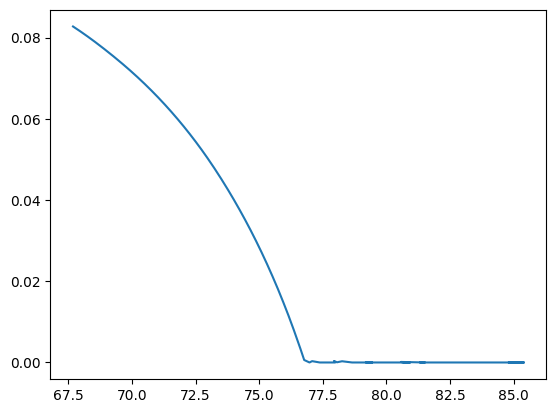

EJinv -4.35706162436094
EJderiv -1.6032503721782518
EJinv diff 1j 2s: 1.5768580975241526
EJinv diff 1 sen: 1.0228102027414143
EJinv diff 2 sen: 1.0100362139766488
n0_star borders 0.0 2.1123247455289915
Diff Rho: 0.017412217534317178
EJinv -3.987485447015088
EJderiv -1.3753632462022694
EJinv diff 1j 2s: 2.1235568655564836
EJinv diff 1 sen: 0.8381034480573253
EJinv diff 2 sen: 0.3352926447959537
n0_star borders 0.0 2.08816062419686
Diff Rho: inf
EJinv -3.5150741757535937
EJderiv -0.9654727907073806
EJinv diff 1j 2s: 0.6652936595117829
EJinv diff 1 sen: 0.7274593718219455
EJinv diff 2 sen: 0.4278698549565729


c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 2.048498724152331
Diff Rho: inf
EJinv -3.0771822247003606
EJderiv -0.4702973950138585
EJinv diff 1j 2s: 1.0436293194816821
EJinv diff 1 sen: 0.550683906378315
EJinv diff 2 sen: 0.300823461699572
n0_star borders 0.0 2.0032347652534024
Diff Rho: inf
EJinv -2.66379111538187
EJderiv -0.907449413510264
EJinv diff 1j 2s: 0.748223887656182
EJinv diff 1 sen: 0.4738365217350461
EJinv diff 2 sen: 0.36472946176020227
n0_star borders 0.0 1.9882726962725306
Diff Rho: inf
EJinv -2.2768400085756615
EJderiv -0.2805878707661549
EJinv diff 1j 2s: 0.7539408350762855
EJinv diff 1 sen: 0.588498724726639
EJinv diff 2 sen: 0.26136251729810017
n0_star borders 0.0 1.9688668693336373
Diff Rho: inf
EJinv -1.921507917819308
EJderiv -0.5875129311648237
EJinv diff 1j 2s: 0.9002325059307907
EJinv diff 1 sen: 0.36063526593038425
EJinv diff 2 sen: 0.3026563565002114
n0_star borders 0.0 1.9461162157434195
Diff Rho: inf
EJinv -1.604427996478307
EJderiv 0.17641902609025806
EJinv diff 1j 2s: 0.95453742

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 0.0
Diff Rho: 0.02564743612923607
EJinv -0.7137672364098503
EJderiv -1.1765112084494689
EJinv diff 1j 2s: 2.409735866489082
EJinv diff 1 sen: 8.899359527489137
EJinv diff 2 sen: 0.6029015294411079
n0_star borders 0.0 0.0
Diff Rho: 0.023960567865994715
EJinv -1.5120527966808812
EJderiv -1.2118928304464163
EJinv diff 1j 2s: 1.6875281630417187
EJinv diff 1 sen: 8.234768320599802
EJinv diff 2 sen: 0.6934214087981635
n0_star borders 0.0 0.0
Diff Rho: 0.02243548550387789
EJinv -2.139945080864771
EJderiv -1.2757826550111986
EJinv diff 1j 2s: 2.20263205470173
EJinv diff 1 sen: 4.347089275147862
EJinv diff 2 sen: 0.9614854287526295
n0_star borders 0.0 0.0
Diff Rho: 0.021046547992704702
EJinv -2.6322753060183186
EJderiv -1.3622638645958176
EJinv diff 1j 2s: 1.131059963657416
EJinv diff 1 sen: 10.759529335841773
EJinv diff 2 sen: 1.1021290450446704
n0_star borders 0.0 0.0
Diff Rho: 0.019814471309411136
EJinv -3.0174745548198953
EJderiv -1.4664345145832414
EJinv diff 1j 2s: 0.9

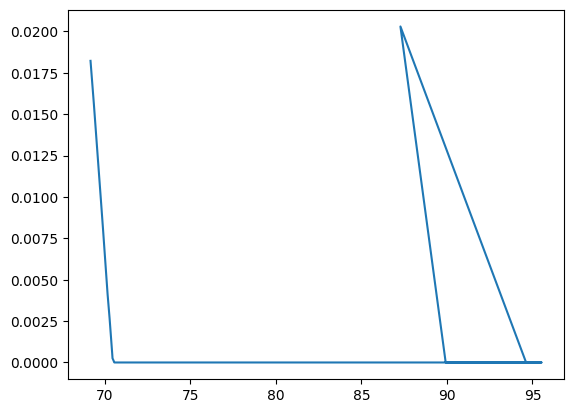

EJinv -2.846424000598836
EJderiv -3.00640871484579
EJinv diff 1j 2s: 0.2744328820004843
EJinv diff 1 sen: 0.22414075775988862
EJinv diff 2 sen: 3.3877660900079727
n0_star borders 0.0 1.8083201689674144
Diff Rho: inf
EJinv -2.844013390622337
EJderiv -2.9667299068038915
EJinv diff 1j 2s: 0.27197943490565024
EJinv diff 1 sen: 0.18383760524021425
EJinv diff 2 sen: 0.5307910740436458
n0_star borders 0.0 1.7579517146958157
Diff Rho: inf
EJinv -2.8223254905751416
EJderiv -2.968129946130688
EJinv diff 1j 2s: 0.260937425214811
EJinv diff 1 sen: 0.1753767595076644
EJinv diff 2 sen: 9.578149406685188
n0_star borders 0.0 1.7002531240137784
Diff Rho: inf
EJinv -2.805972102650326
EJderiv -2.9674323283705633
EJinv diff 1j 2s: 0.26039522195271575
EJinv diff 1 sen: 0.1620915420768416
EJinv diff 2 sen: 0.8567498956461498
n0_star borders 0.0 1.663494078587727
Diff Rho: inf
EJinv -2.793778866141999
EJderiv -2.9649787414538338
EJinv diff 1j 2s: 0.2622781134656605
EJinv diff 1 sen: 0.17420863313483215
EJinv

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 0.0
Diff Rho: 0.009882697555085758
EJinv -3.337708398778593
EJderiv -3.5129980840383865
EJinv diff 1j 2s: 0.23125403307677644
EJinv diff 1 sen: 1.188353899381098
EJinv diff 2 sen: 2.2898178279222745
n0_star borders 0.0 1.3381414476488125
Diff Rho: 0.010034140501570761
EJinv -3.360562777910988
EJderiv -3.5175131948413707
EJinv diff 1j 2s: 0.23406770209583802
EJinv diff 1 sen: 1.088563960934886
EJinv diff 2 sen: 1.500852626359705
n0_star borders 0.0 1.282194100581942
Diff Rho: 0.01000729150484818
EJinv -3.3808792217969743
EJderiv -3.5226795366516086
EJinv diff 1j 2s: 0.2337224035493011
EJinv diff 1 sen: 7.095000686108962
EJinv diff 2 sen: 1.6807086928945247
n0_star borders 0.0 0.0
Diff Rho: 0.009951893786405501
EJinv -3.399135825807337
EJderiv -3.5283630027798267
EJinv diff 1j 2s: 0.2333758592216724
EJinv diff 1 sen: 4.321673606218009
EJinv diff 2 sen: 1.9846340556842306
n0_star borders 0.0 1.2519719135484286
Diff Rho: 0.009877703945265385
EJinv -3.4156190860618127
EJ

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 1.7370000541998571
Diff Rho: inf
EJinv -3.0973761341973463
EJderiv -3.078235514689709
EJinv diff 1j 2s: 0.3606644358001913
EJinv diff 1 sen: 0.1954265106140169
EJinv diff 2 sen: 0.4468641412383198
n0_star borders 0.0 1.6922584514153232
Diff Rho: inf
EJinv -3.084461558914384
EJderiv -3.0807193887764726
EJinv diff 1j 2s: 0.5189012609797765
EJinv diff 1 sen: 0.18539573272648144
EJinv diff 2 sen: 0.4413015721341992
n0_star borders 0.0 1.7229079809031815
Diff Rho: inf
EJinv -3.074565784027958
EJderiv -3.0818732150520844
EJinv diff 1j 2s: 0.3207949684646556
EJinv diff 1 sen: 0.1779140865202074
EJinv diff 2 sen: 0.5029720279028055
n0_star borders 0.0 1.6283848468161324
Diff Rho: inf
EJinv -3.0669635907166963
EJderiv -3.0819155542569376
EJinv diff 1j 2s: 0.3618964696000663
EJinv diff 1 sen: 0.17667513503768628
EJinv diff 2 sen: 0.49687227709218607
n0_star borders 0.0 1.6040824363562163
Diff Rho: inf
EJinv -3.061298453571021
EJderiv -3.0809490200185223
EJinv diff 1j 2s: 11.2

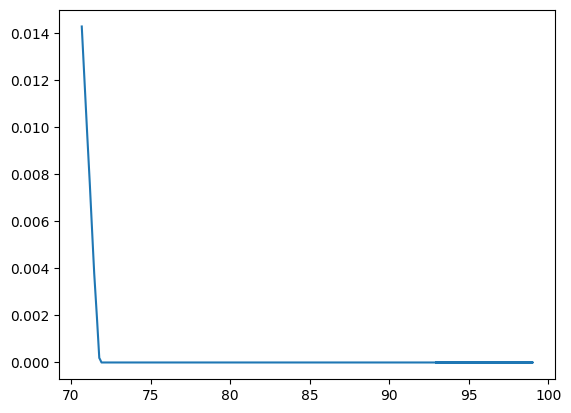

EJinv -3.195521183638788
EJderiv -3.435772015979026
EJinv diff 1j 2s: 0.19778772039385747
EJinv diff 1 sen: 0.22592386960322103
EJinv diff 2 sen: 0.6627199721203092
n0_star borders 0.0 1.6630452981618427
Diff Rho: 0.011013699338017581
EJinv -3.1956189084759656
EJderiv -3.4162670645154947
EJinv diff 1j 2s: 0.19496595323904706
EJinv diff 1 sen: 0.1893917792409569
EJinv diff 2 sen: 0.4361432644399924
n0_star borders 0.0 1.6358077193364062
Diff Rho: 0.011081564861750399
EJinv -3.1897064342995156
EJderiv -3.419338955259647
EJinv diff 1j 2s: 0.16945146644970463
EJinv diff 1 sen: 0.19259684713537345
EJinv diff 2 sen: 0.5154997756655032
n0_star borders 0.0 1.6098021180896311
Diff Rho: inf
EJinv -3.1850567822015314
EJderiv -3.4216819326354653
EJinv diff 1j 2s: 0.16635998364771296
EJinv diff 1 sen: 0.2072500885572394
EJinv diff 2 sen: 0.7467695824116918
n0_star borders 0.0 1.5853272427185385
Diff Rho: 0.011265284325444623
EJinv -3.181486655659367
EJderiv -3.4233492616635175
EJinv diff 1j 2s: 0.1

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 1.6068838513125112
Diff Rho: 0.012355437095177687
EJinv -3.1476751111819192
EJderiv -2.963076846258801
EJinv diff 1j 2s: 0.20666558306482463
EJinv diff 1 sen: 0.21086096252465025
EJinv diff 2 sen: 0.9924255568653058
n0_star borders 0.0 1.5825039059518287
Diff Rho: 0.012389618691199209
EJinv -3.1455987116210204
EJderiv -2.96434576365219
EJinv diff 1j 2s: 0.16818645701837567
EJinv diff 1 sen: 0.22717039322221755
EJinv diff 2 sen: 0.7783299451847093
n0_star borders 0.0 1.5598680997543193
Diff Rho: inf
EJinv -3.1443550598686114
EJderiv -2.965017123086241
EJinv diff 1j 2s: 0.16880794789299902
EJinv diff 1 sen: 0.21565894967938737
EJinv diff 2 sen: 1.564106391152688
n0_star borders 0.0 1.5390778712426365
Diff Rho: 0.012456405624263006
EJinv -3.1439351827911746
EJderiv -2.9650882984437885
EJinv diff 1j 2s: 0.17050751702964598
EJinv diff 1 sen: 0.3064247667056788
EJinv diff 2 sen: 0.6737061545780676
n0_star borders 0.0 1.5201556756863923
Diff Rho: 0.012508091229440141
EJinv

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 0.0
Diff Rho: 0.011642722807005413
EJinv -3.3028303749615886
EJderiv -2.9330435185079438
EJinv diff 1j 2s: 0.1960925677287092
EJinv diff 1 sen: 0.3249028172433757
EJinv diff 2 sen: 1.0983861536003154
n0_star borders 0.0 0.0
Diff Rho: 0.011823699145637839
EJinv -3.3211036533815284
EJderiv -2.9387363585065316
EJinv diff 1j 2s: 0.20836540014610683
EJinv diff 1 sen: 0.2918145086544071
EJinv diff 2 sen: 0.5296518460861365
n0_star borders 0.0 0.0
Diff Rho: 0.011932031732262326
EJinv -3.3361070562979704
EJderiv -2.9454661720662045
EJinv diff 1j 2s: 0.21259732425698658
EJinv diff 1 sen: 0.2552054768186386
EJinv diff 2 sen: 0.43666710454354946
n0_star borders 0.0 0.0
Diff Rho: 0.011990301752352035
EJinv -3.34876848817991
EJderiv -2.952867653459876
EJinv diff 1j 2s: 0.21104544169413006
EJinv diff 1 sen: 0.20409781817766295
EJinv diff 2 sen: 0.5150589415819727
n0_star borders 0.0 0.0
Diff Rho: 0.012013806283983505
EJinv -3.359650582090663
EJderiv -2.9607316690677123
EJinv diff

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 1.606540218064615
Diff Rho: inf
EJinv -3.1179129801516496
EJderiv -3.471132226932369
EJinv diff 1j 2s: 0.1967462358646005
EJinv diff 1 sen: 0.2880409936129681
EJinv diff 2 sen: 0.4195126227660201
n0_star borders 0.0 1.5821722812278982
Diff Rho: inf
EJinv -3.1155845143248606
EJderiv -3.472132231062588
EJinv diff 1j 2s: 0.19659390130055515
EJinv diff 1 sen: 0.1927323498315428
EJinv diff 2 sen: 0.40131856512941055
n0_star borders 0.0 1.5595463109584482
Diff Rho: 0.013603824500561301
EJinv -3.1141287301094054
EJderiv -3.472537235852073
EJinv diff 1j 2s: 0.1969690177262224
EJinv diff 1 sen: 0.25307390034994004
EJinv diff 2 sen: 0.35235057156783767
n0_star borders 0.0 1.5387634727772952
Diff Rho: 0.013616053409079223
EJinv -3.113537380770484
EJderiv -3.4723400701412857
EJinv diff 1j 2s: 0.19826764563940424
EJinv diff 1 sen: 0.27555799496641575
EJinv diff 2 sen: 0.44511255315988923
n0_star borders 0.0 1.5198463834552691
Diff Rho: 0.01363101914250305
EJinv -3.11381357507575

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 0.0
Diff Rho: 0.012482889836857912
EJinv -3.272278829158941
EJderiv -3.4310370054639066
EJinv diff 1j 2s: 0.195543964523861
EJinv diff 1 sen: 0.20449226612395038
EJinv diff 2 sen: 1.038813391582063
n0_star borders 0.0 0.0
Diff Rho: 0.012632185461562879
EJinv -3.290664444305116
EJderiv -3.43626978178159
EJinv diff 1j 2s: 0.21357468207449343
EJinv diff 1 sen: 0.20904501053507554
EJinv diff 2 sen: 0.5786645878276634
n0_star borders 0.0 0.0
Diff Rho: 0.01272777969104125
EJinv -3.3057299635208084
EJderiv -3.44259025938166
EJinv diff 1j 2s: 0.22208416033121808
EJinv diff 1 sen: 0.21610993361336048
EJinv diff 2 sen: 0.4535243739505514
n0_star borders 0.0 0.0
Diff Rho: 0.012785838892143889
EJinv -3.318416701417072
EJderiv -3.4496221821161868
EJinv diff 1j 2s: 0.22451771641494397
EJinv diff 1 sen: 0.21993265732404552
EJinv diff 2 sen: 0.48311376419589047
n0_star borders 0.0 0.0
Diff Rho: 0.012795477069234128
EJinv -3.3292970605473347
EJderiv -3.4571490091249757
EJinv diff 1j

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 1.6086135224699727
Diff Rho: 0.014091716977472659
EJinv -3.0812792829108098
EJderiv -2.9701560832375833
EJinv diff 1j 2s: 0.17797113902388612
EJinv diff 1 sen: 2.0734509689801452
EJinv diff 2 sen: 0.3784200169956437
n0_star borders 0.0 1.5841386784175353
Diff Rho: inf
EJinv -3.0800247801159073
EJderiv -2.970812710780052
EJinv diff 1j 2s: 0.1779118426750727
EJinv diff 1 sen: 2.22598866299427
EJinv diff 2 sen: 0.38888409700640525
n0_star borders 0.0 1.5613927108103542
Diff Rho: inf
EJinv -3.0795132779323304
EJderiv -2.97091680811927
EJinv diff 1j 2s: 0.18022083404571443
EJinv diff 1 sen: 1.835326680037174
EJinv diff 2 sen: 0.3851684360442616
n0_star borders 0.0 1.7791256029007017
Diff Rho: inf
EJinv -3.079764865831656
EJderiv -2.9704496022171867
EJinv diff 1j 2s: 0.1833877915077913
EJinv diff 1 sen: 3.0790608035133116
EJinv diff 2 sen: 0.47648851580870466
n0_star borders 0.0 1.716557983749276
Diff Rho: inf
EJinv -3.0808053879959965
EJderiv -2.969396459909987
EJinv dif

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 0.0
Diff Rho: 0.013101296767392688
EJinv -3.252581123435422
EJderiv -2.9184607868136396
EJinv diff 1j 2s: 0.17892578761400685
EJinv diff 1 sen: 1.616826591052296
EJinv diff 2 sen: 5.80811881273071
n0_star borders 0.0 0.0
Diff Rho: 0.01323427619234622
EJinv -3.270024357294021
EJderiv -2.9234761955752617
EJinv diff 1j 2s: 0.19122149858465384
EJinv diff 1 sen: 4.265452780106895
EJinv diff 2 sen: 0.7523751376658799
n0_star borders 0.0 0.0
Diff Rho: 0.013343149722116934
EJinv -3.284196772560936
EJderiv -2.929613212927933
EJinv diff 1j 2s: 0.1958368278270765
EJinv diff 1 sen: 2.301527521815938
EJinv diff 2 sen: 0.5105809483340948
n0_star borders 0.0 0.0
Diff Rho: 0.013369354663841902
EJinv -3.295999394505504
EJderiv -2.9365063767261717
EJinv diff 1j 2s: 0.19475162051468473
EJinv diff 1 sen: 2.570976486183871
EJinv diff 2 sen: 0.4459871363079524
n0_star borders 0.0 0.0
Diff Rho: 0.013364972351920096
EJinv -3.305985488784119
EJderiv -2.9439424329978863
EJinv diff 1j 2s: 0.1

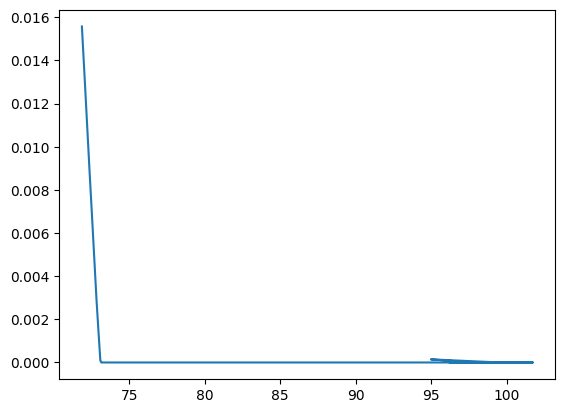

EJinv -3.0402343577720603
EJderiv -3.459293596405189
EJinv diff 1j 2s: 0.1836387294178318
EJinv diff 1 sen: 3.7382554560665935
EJinv diff 2 sen: 0.6960141226459248
n0_star borders 0.0 1.6665568244939664
Diff Rho: 0.014564014334414127
EJinv -3.0409408356842076
EJderiv -3.4476673031569334
EJinv diff 1j 2s: 0.18498336751989508
EJinv diff 1 sen: 0.19016510868171588
EJinv diff 2 sen: 0.42432887925182183
n0_star borders 0.0 1.6391964565450245
Diff Rho: 0.014612484463221987
EJinv -3.037610848391724
EJderiv -3.4492052456636912
EJinv diff 1j 2s: 0.18445097124202217
EJinv diff 1 sen: 0.1912882720427064
EJinv diff 2 sen: 0.3693479816986079
n0_star borders 0.0 1.6130161476793972
Diff Rho: inf
EJinv -3.0351550620303502
EJderiv -3.450194699331263
EJinv diff 1j 2s: 0.18307478179369582
EJinv diff 1 sen: 0.19341145137559204
EJinv diff 2 sen: 0.354677962954094
n0_star borders 0.0 1.588331929926398
Diff Rho: inf
EJinv -3.033513668239308
EJderiv -3.450635849423577
EJinv diff 1j 2s: 0.1792482605476969
EJin

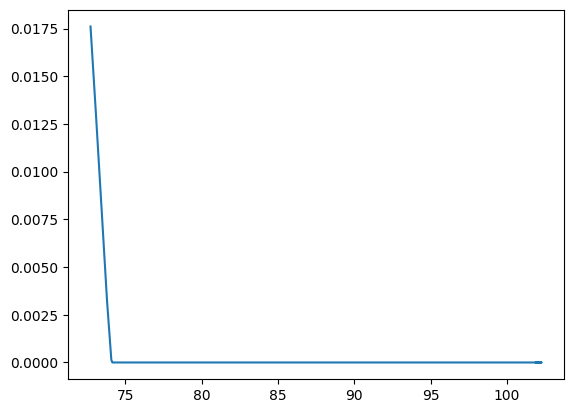

EJinv -2.8697615853427623
EJderiv -3.13580328924931
EJinv diff 1j 2s: 0.1825899661077463
EJinv diff 1 sen: 0.2747187562953464
EJinv diff 2 sen: 0.3927287681902978
n0_star borders 0.0 1.6896895741284819
Diff Rho: inf
EJinv -2.869930341019908
EJderiv -3.1281544665831262
EJinv diff 1j 2s: 0.18240540430273827
EJinv diff 1 sen: 0.2576877746272832
EJinv diff 2 sen: 0.32469323721178467
n0_star borders 0.0 1.6619255064918654
Diff Rho: inf
EJinv -2.8669499326864987
EJderiv -3.128419089885284
EJinv diff 1j 2s: 0.16990257339182555
EJinv diff 1 sen: 0.247152364560682
EJinv diff 2 sen: 0.3372648432311729
n0_star borders 0.0 1.6350765162792051
Diff Rho: inf
EJinv -2.864967345841769
EJderiv -3.128124161384406
EJinv diff 1j 2s: 0.16867270857853583
EJinv diff 1 sen: 0.2144286959121652
EJinv diff 2 sen: 0.33901806005981494
n0_star borders 0.0 1.60953932370639
Diff Rho: 0.015284597015897546
EJinv -2.8639181452533897
EJderiv -3.127255747496079
EJinv diff 1j 2s: 0.1686440891955092
EJinv diff 1 sen: 0.22250

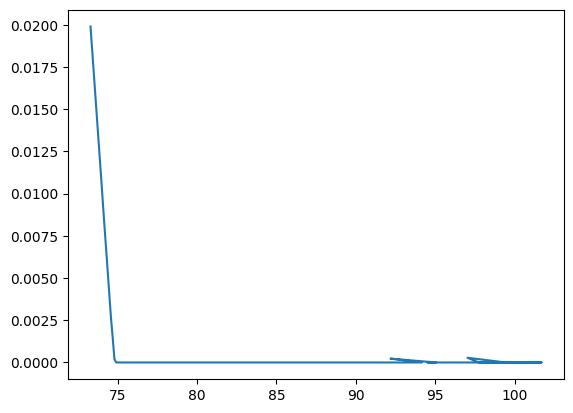

EJinv -2.7291462848183556
EJderiv -2.412040503742162
EJinv diff 1j 2s: 0.1915161306451229
EJinv diff 1 sen: 0.2598195651437384
EJinv diff 2 sen: 0.6205075712702559
n0_star borders 0.0 1.7125190324836619
Diff Rho: inf
EJinv -2.7285377058283706
EJderiv -2.4056675444984847
EJinv diff 1j 2s: 0.19101920699071323
EJinv diff 1 sen: 0.203702721673072
EJinv diff 2 sen: 2.127622777904331
n0_star borders 0.0 1.6846000263710623
Diff Rho: 0.014260411273519251
EJinv -2.724312817483626
EJderiv -2.4050994149792047
EJinv diff 1j 2s: 0.18850065189157375
EJinv diff 1 sen: 0.19788782675775834
EJinv diff 2 sen: 4.376049493384266
n0_star borders 0.0 1.6572943631136918
Diff Rho: inf
EJinv -2.7212607204971566
EJderiv -2.4038990520520827
EJinv diff 1j 2s: 0.18702116635755994
EJinv diff 1 sen: 0.2002968530360041
EJinv diff 2 sen: 0.9268049967541333
n0_star borders 0.0 1.6310708638688172
Diff Rho: inf
EJinv -2.7193529488750356
EJderiv -2.402035756769777
EJinv diff 1j 2s: 0.18398924077248419
EJinv diff 1 sen: 0.2

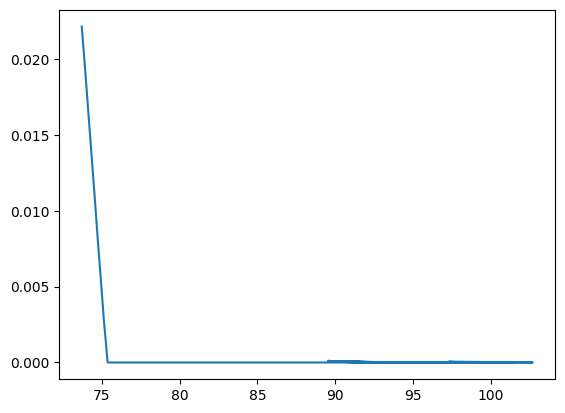

EJinv -2.598356112486152
EJderiv -2.429072728193262
EJinv diff 1j 2s: 0.16712680805995314
EJinv diff 1 sen: 10.093100432525437
EJinv diff 2 sen: 0.4962480490507257
n0_star borders 0.0 1.7333250172374517
Diff Rho: inf
EJinv -2.5964488216127073
EJderiv -2.425322456559954
EJinv diff 1j 2s: 0.16716775269796888
EJinv diff 1 sen: 0.20038366534163468
EJinv diff 2 sen: 0.42461071773676634
n0_star borders 0.0 1.7054984889565246
Diff Rho: 0.013501275096341967
EJinv -2.5907477490586874
EJderiv -2.424346732092488
EJinv diff 1j 2s: 0.1662195592606038
EJinv diff 1 sen: 0.2075968801916143
EJinv diff 2 sen: 0.4262673835287065
n0_star borders 0.0 1.6779583108988887
Diff Rho: inf
EJinv -2.5864216831179356
EJderiv -2.4226262946200166
EJinv diff 1j 2s: 0.16613745040682212
EJinv diff 1 sen: 0.20793962954528158
EJinv diff 2 sen: 2.4479072462212144
n0_star borders 0.0 1.6512417473598902
Diff Rho: 0.013551454168744469
EJinv -2.583480395845976
EJderiv -2.420111884286257
EJinv diff 1j 2s: 0.16761549630136707
EJ

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 0.0
Diff Rho: 0.011789715989524848
EJinv -3.0060467615714987
EJderiv -2.6235599822982323
EJinv diff 1j 2s: 0.1663298362897919
EJinv diff 1 sen: 2.4329495510161507
EJinv diff 2 sen: 0.5538446651085632
n0_star borders 0.0 0.0
Diff Rho: inf
EJinv -2.9966690379643013
EJderiv -2.6369615686900403
EJinv diff 1j 2s: 0.17255150941619
EJinv diff 1 sen: 3.9853536067561026
EJinv diff 2 sen: 0.43887203093629334
n0_star borders 0.0 0.0
Diff Rho: inf
EJinv -2.986252839043979
EJderiv -2.6508506502651414
EJinv diff 1j 2s: 0.17301511252868262
EJinv diff 1 sen: 3.1347204348180315
EJinv diff 2 sen: 0.4102323099218937
n0_star borders 0.0 0.0
Diff Rho: 0.011741645900520958
EJinv -2.974819846715242
EJderiv -2.665223838894363
EJinv diff 1j 2s: 0.17669925875234443
EJinv diff 1 sen: 2.6456356188297065
EJinv diff 2 sen: 0.49080468406529615
n0_star borders 0.0 0.0
Diff Rho: 0.011732962458405582
EJinv -2.9623893273140856
EJderiv -2.6800775421111496
EJinv diff 1j 2s: 0.18404677618348902
EJinv di

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 1.7474981243579006
Diff Rho: 0.012334268532527294
EJinv -2.512944013737612
EJderiv -3.063370559363321
EJinv diff 1j 2s: 0.5567423044354435
EJinv diff 1 sen: 0.21394326524364574
EJinv diff 2 sen: 0.4015940275215637
n0_star borders 0.0 1.7198809967803297
Diff Rho: 0.012371087477868886
EJinv -2.5050973229265234
EJderiv -3.062688665258321
EJinv diff 1j 2s: 0.5075652501516775
EJinv diff 1 sen: 0.21436180993456286
EJinv diff 2 sen: 0.44245116332500534
n0_star borders 0.0 1.692301113973054
Diff Rho: inf
EJinv -2.4986998952883788
EJderiv -3.0612048547832273
EJinv diff 1j 2s: 0.42584587869664214
EJinv diff 1 sen: 0.21515510794144493
EJinv diff 2 sen: 1.1403777477048027
n0_star borders 0.0 1.6653383824840198
Diff Rho: inf
EJinv -2.49379556292852
EJderiv -3.0588497197220477
EJinv diff 1j 2s: 0.5878392768194783
EJinv diff 1 sen: 0.20972124349281696
EJinv diff 2 sen: 0.5145739261176102
n0_star borders 0.0 1.6394970930570871
Diff Rho: inf
EJinv -2.490455649873926
EJderiv -3.05555

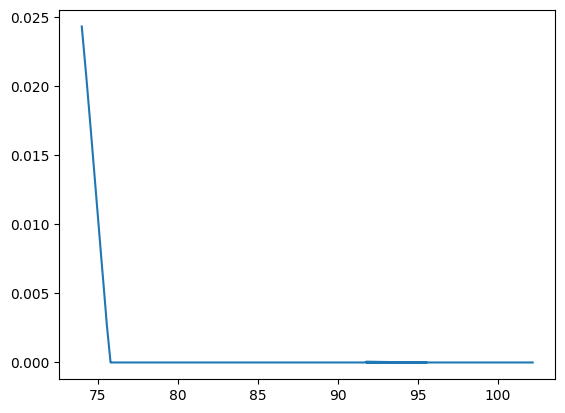

EJinv -2.489245615298905
EJderiv -2.2397934432771933
EJinv diff 1j 2s: 0.22032525265101335
EJinv diff 1 sen: 0.27000072944156817
EJinv diff 2 sen: 0.4064042081682241
n0_star borders 0.0 1.7508924795101515
Diff Rho: 0.012380603227586327
EJinv -2.485378392314639
EJderiv -2.2394101777592397
EJinv diff 1j 2s: 0.2221070660570793
EJinv diff 1 sen: 0.2106314820042652
EJinv diff 2 sen: 0.4795216939277812
n0_star borders 0.0 1.723363170439188
Diff Rho: inf
EJinv -2.477547232061803
EJderiv -2.238564308369746
EJinv diff 1j 2s: 0.22081408264912303
EJinv diff 1 sen: 0.2122792927028815
EJinv diff 2 sen: 1.4994471683603958
n0_star borders 0.0 1.6958100803967184
Diff Rho: inf
EJinv -2.471236043972094
EJderiv -2.2368886954499203
EJinv diff 1j 2s: 0.22125374054965974
EJinv diff 1 sen: 0.20996542373660348
EJinv diff 2 sen: 0.4056216917951223
n0_star borders 0.0 1.6688226467272513
Diff Rho: inf
EJinv -2.466480805037656
EJderiv -2.234315156293576
EJinv diff 1j 2s: 0.22291263005936968
EJinv diff 1 sen: 0.21

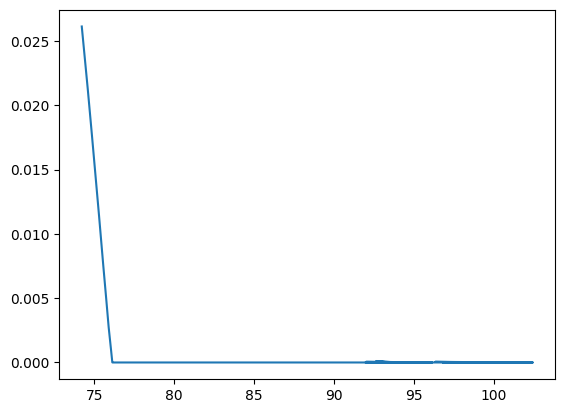

EJinv -2.406196119573865
EJderiv -2.874694045153035
EJinv diff 1j 2s: 0.34966700962362013
EJinv diff 1 sen: 2.2531332858956716
EJinv diff 2 sen: 0.6465993823995516
n0_star borders 0.0 1.7635605823932545
Diff Rho: 0.011965203162799773
EJinv -2.4013654659033197
EJderiv -2.8765417726226303
EJinv diff 1j 2s: 0.3609076121288811
EJinv diff 1 sen: 0.19761872991611942
EJinv diff 2 sen: 0.5541096187145238
n0_star borders 0.0 1.7363654244818851
Diff Rho: inf
EJinv -2.3921930971396224
EJderiv -2.875461865560524
EJinv diff 1j 2s: 0.3720263579478781
EJinv diff 1 sen: 0.22325250922698103
EJinv diff 2 sen: 0.4259954881106608
n0_star borders 0.0 1.7089111125828165
Diff Rho: inf
EJinv -2.3846742941065604
EJderiv -2.8734710981831455
EJinv diff 1j 2s: 0.38521912090520466
EJinv diff 1 sen: 0.2202943452375153
EJinv diff 2 sen: 0.3928952300675558
n0_star borders 0.0 1.6818154039773114
Diff Rho: 0.012050024936049427
EJinv -2.3788597046130793
EJderiv -2.870487817869332
EJinv diff 1j 2s: 0.3966567383665183
EJi

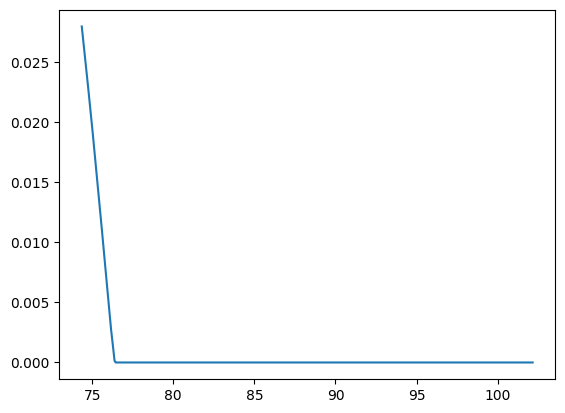

EJinv -2.3204858042944325
EJderiv -2.3662389143033806
EJinv diff 1j 2s: 0.3252253039101172
EJinv diff 1 sen: 10.01947922047936
EJinv diff 2 sen: 0.9784980550194782
n0_star borders 0.0 1.7750115290680917
Diff Rho: 0.011276724822473218
EJinv -2.3138242462358853
EJderiv -2.370729128389044
EJinv diff 1j 2s: 0.32487708504836293
EJinv diff 1 sen: 2.9083629956619683
EJinv diff 2 sen: 0.46277727276797864
n0_star borders 0.0 1.7482213184135253
Diff Rho: inf
EJinv -2.302254523813184
EJderiv -2.3700454107081157
EJinv diff 1j 2s: 0.3220422667461696
EJinv diff 1 sen: 3.392145124732018
EJinv diff 2 sen: 1.6439707364147658
n0_star borders 0.0 1.7209451599184313
Diff Rho: 0.011285478812477972
EJinv -2.2924684828942183
EJderiv -2.3683796682630174
EJinv diff 1j 2s: 0.321340103818673
EJinv diff 1 sen: 2.0481841425687035
EJinv diff 2 sen: 0.6895838946314715


c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 1.6938238552583615
Diff Rho: inf
EJinv -2.284518219633036
EJderiv -2.3656430775319848
EJinv diff 1j 2s: 0.32107339207138524
EJinv diff 1 sen: 2.3881052603724044
EJinv diff 2 sen: 0.5926582998181652
n0_star borders 0.0 1.6674531268798969
Diff Rho: inf
EJinv -2.2784825413304945
EJderiv -2.3617585483843015
EJinv diff 1j 2s: 0.3231263441612199
EJinv diff 1 sen: 2.333059856467617
EJinv diff 2 sen: 0.5014980291136264
n0_star borders 0.0 1.642326241093587
Diff Rho: inf
EJinv -2.274448334855835
EJderiv -2.3566681441276103
EJinv diff 1j 2s: 0.3129664337130283
EJinv diff 1 sen: 2.8416434205747882
EJinv diff 2 sen: 0.5941338528550112
n0_star borders 0.0 1.6188175287762956
Diff Rho: inf
EJinv -2.2723824736803473
EJderiv -2.3503882260811366
EJinv diff 1j 2s: 0.3165738185844554
EJinv diff 1 sen: 2.434243174503394
EJinv diff 2 sen: 0.7928333555079857
n0_star borders 0.0 1.59717305504041
Diff Rho: 0.011284855338022521
EJinv -2.272326258203638
EJderiv -2.342909559639196
EJinv diff 1

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 0.0
Diff Rho: 0.010828171762514946
EJinv -2.9257265892622337
EJderiv -2.8726973137560066
EJinv diff 1j 2s: 0.20998944723074098
EJinv diff 1 sen: 0.24760195312796307
EJinv diff 2 sen: 0.6159726092133478
n0_star borders 0.0 0.0
Diff Rho: 0.010813885643228844
EJinv -2.9326854681311163
EJderiv -2.8777517172954106
EJinv diff 1j 2s: 0.21409331694314418
EJinv diff 1 sen: 0.25941886328476826
EJinv diff 2 sen: 0.6459195234095099
n0_star borders 0.0 0.0
Diff Rho: 0.01078531213075524
EJinv -2.9366689335632064
EJderiv -2.8841785257908867
EJinv diff 1j 2s: 0.21700069439838945
EJinv diff 1 sen: 0.237115301367058
EJinv diff 2 sen: 5.323081198161778
n0_star borders 0.0 0.0
Diff Rho: 0.010741945536445911
EJinv -2.9382828499532674
EJderiv -2.8917072089139566
EJinv diff 1j 2s: 0.23446071799020105
EJinv diff 1 sen: 0.24437839791743027
EJinv diff 2 sen: 0.5426575747758728
n0_star borders 0.0 0.0
Diff Rho: inf
EJinv -2.9379350280890386
EJderiv -2.9001572620665
EJinv diff 1j 2s: 0.2403830

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 1.6949435717884938
Diff Rho: inf
EJinv -2.2834487486157706
EJderiv -2.4488100335254472
EJinv diff 1j 2s: 0.2767398024991958
EJinv diff 1 sen: 0.22097962778308822
EJinv diff 2 sen: 0.5715770793848136
n0_star borders 0.0 1.6685674319358141
Diff Rho: inf
EJinv -2.278018888843643
EJderiv -2.444592116195153
EJinv diff 1j 2s: 0.27731349646096337
EJinv diff 1 sen: 0.24232376721950857
EJinv diff 2 sen: 0.49606348845121373
n0_star borders 0.0 1.643422836548626
Diff Rho: 0.011154122936857224
EJinv -2.2746296016111693
EJderiv -2.4391432011330494
EJinv diff 1j 2s: 0.2789210569453056
EJinv diff 1 sen: 0.36556343863957824
EJinv diff 2 sen: 0.4401012179514409
n0_star borders 0.0 1.6198875101913277
Diff Rho: 0.011184517882565758
EJinv -2.273247268246663
EJderiv -2.432481664518747
EJinv diff 1j 2s: 0.27330906912829744
EJinv diff 1 sen: 1.2664722222987277
EJinv diff 2 sen: 0.42995358169347003
n0_star borders 0.0 1.5982114415911242
Diff Rho: inf
EJinv -2.2739338757935026
EJderiv -2.42

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 0.0
Diff Rho: 0.010731563887597441
EJinv -2.9261831687588176
EJderiv -2.9550117896040433
EJinv diff 1j 2s: 0.3145919488235204
EJinv diff 1 sen: 2.200970911792373
EJinv diff 2 sen: 0.47637899060791594
n0_star borders 0.0 0.0
Diff Rho: 0.010724877260413025
EJinv -2.932795120673888
EJderiv -2.96026355689699
EJinv diff 1j 2s: 1.0012878344473342
EJinv diff 1 sen: 2.386433881172501
EJinv diff 2 sen: 0.42060920039110855
n0_star borders 0.0 0.0
Diff Rho: 0.010695725592075041
EJinv -2.936493379503092
EJderiv -2.966859648297458
EJinv diff 1j 2s: 0.4162224518333475
EJinv diff 1 sen: 3.0089751940681917
EJinv diff 2 sen: 0.40002298664209907
n0_star borders 0.0 0.0
Diff Rho: 0.01064959394888853
EJinv -2.9378648526226914
EJderiv -2.9745381671352646
EJinv diff 1j 2s: 0.530589024661311
EJinv diff 1 sen: 2.055447134540854
EJinv diff 2 sen: 0.3850318396386149
n0_star borders 0.0 0.0
Diff Rho: 0.010608804283594848
EJinv -2.937303797733148
EJderiv -2.983124698888801
EJinv diff 1j 2s: 1.

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:615: RuntimeWarning: divide by zero encountered in divide
  print("Diff Rho:", np.mean(np.abs((Rho_alt[comparison_range]-Rho[comparison_range])/Rho[comparison_range])))


n0_star borders 0.0 0.0
Diff Rho: 0.010352139187309739
EJinv -2.8187835062791335
EJderiv -2.2139365529489794
EJinv diff 1j 2s: 0.21133131453265452
EJinv diff 1 sen: 0.2816207390407942
EJinv diff 2 sen: 0.3928174029829299
n0_star borders 0.0 0.0
Diff Rho: 0.010335037925234932
EJinv -2.802996277643821
EJderiv -2.2296475603046417
EJinv diff 1j 2s: 0.20991756088320307
EJinv diff 1 sen: 0.2910691811457303
EJinv diff 2 sen: 0.3831488461591825
n0_star borders 0.0 0.0
Diff Rho: 0.01030299402901206
EJinv -2.7864753078933004
EJderiv -2.245676198694639
EJinv diff 1j 2s: 0.21239563749882545
EJinv diff 1 sen: 0.4892172378325581
EJinv diff 2 sen: 0.3995432074216412
n0_star borders 0.0 0.0
Diff Rho: 0.010364186657058065
EJinv -2.769277619972709
EJderiv -2.2619866087172937
EJinv diff 1j 2s: 0.21013913400429152
EJinv diff 1 sen: 0.2649103408217786
EJinv diff 2 sen: 0.4533303439392978
n0_star borders 0.0 0.0
Diff Rho: inf
EJinv -2.7514586542416937
EJderiv -2.2785423215554914
EJinv diff 1j 2s: 0.21072481

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


n0_star borders 0.0 1.7526112700169485
Diff Rho: inf
EJinv -2.27474716048953
EJderiv -2.6190115019783065
EJinv diff 1j 2s: 0.26637057883234183
EJinv diff 1 sen: 0.24308300531820695
EJinv diff 2 sen: 0.39944991006601605
n0_star borders 0.0 1.725426648807411
Diff Rho: inf
EJinv -2.2647765154799284
EJderiv -2.6172120654157425
EJinv diff 1j 2s: 0.26564981905744556
EJinv diff 1 sen: 0.22246914815851426
EJinv diff 2 sen: 0.5997035804381529
n0_star borders 0.0 1.6983178246528317
Diff Rho: inf
EJinv -2.2567674532653417
EJderiv -2.614255845538537
EJinv diff 1j 2s: 0.26997687983991997
EJinv diff 1 sen: 0.22044459661349067
EJinv diff 2 sen: 0.5786477345580668
n0_star borders 0.0 1.6718955365058308
Diff Rho: inf
EJinv -2.250806289861002
EJderiv -2.6100608937466916
EJinv diff 1j 2s: 0.32019859177414794
EJinv diff 1 sen: 0.23579894024381048
EJinv diff 2 sen: 0.5627109647249469
n0_star borders 0.0 1.646670734348197
Diff Rho: inf
EJinv -2.246857051384939
EJderiv -2.6046291593224282
EJinv diff 1j 2s: 0

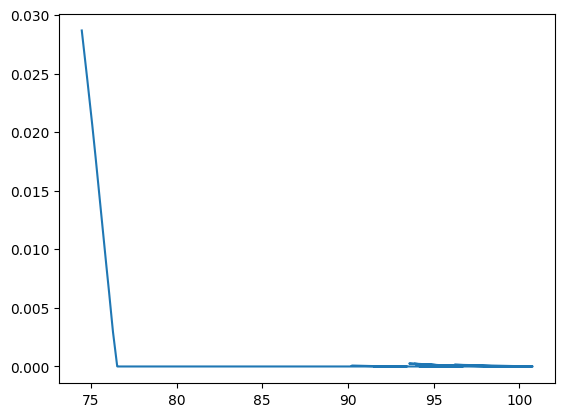

EJinv -2.2808790497813276
EJderiv -2.6927881170225447
EJinv diff 1j 2s: 0.3146844508913245
EJinv diff 1 sen: 0.3023769887304705
EJinv diff 2 sen: 0.3340564921615046
n0_star borders 0.0 1.7802054692733418
Diff Rho: 0.01087695740722033
EJinv -2.2742778070044913
EJderiv -2.697577571920945
EJinv diff 1j 2s: 0.2711804101109431
EJinv diff 1 sen: 0.23786196845335855
EJinv diff 2 sen: 0.3510527757710984
n0_star borders 0.0 1.753662956850719
Diff Rho: 0.010897729730307474
EJinv -2.2626938567605848
EJderiv -2.6964817578720783
EJinv diff 1j 2s: 0.2730489183291235
EJinv diff 1 sen: 0.22810376248560962
EJinv diff 2 sen: 0.38181191327675074
n0_star borders 0.0 1.7265302837220022
Diff Rho: inf
EJinv -2.2529490800391785
EJderiv -2.694373462681696
EJinv diff 1j 2s: 0.2800431909910505
EJinv diff 1 sen: 0.24056742455772478
EJinv diff 2 sen: 0.32721869605749376
n0_star borders 0.0 1.6994520300470883
Diff Rho: 0.010948210801640075
EJinv -2.245105626517346
EJderiv -2.691156071479
EJinv diff 1j 2s: 0.2466253

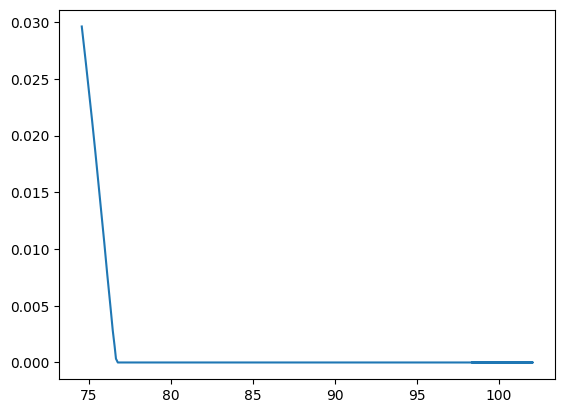

EJinv -2.236976905182643
EJderiv -1.989880813830439
EJinv diff 1j 2s: 0.1413157893301702
EJinv diff 1 sen: 2.846816355109558
EJinv diff 2 sen: 0.4984416163201207
n0_star borders 0.0 1.7859065104488359
Diff Rho: 0.010576554381702715
EJinv -2.2297423525918982
EJderiv -1.9960926331778381
EJinv diff 1j 2s: 0.14144255511976325
EJinv diff 1 sen: 0.24188688091507335
EJinv diff 2 sen: 0.34148114644134686
n0_star borders 0.0 1.7596056365507957
Diff Rho: inf
EJinv -2.2175512803969317
EJderiv -1.9948642996257462
EJinv diff 1j 2s: 0.2129974594669408
EJinv diff 1 sen: 0.36323307020668627
EJinv diff 2 sen: 0.2976965324012747
n0_star borders 0.0 1.7326073550514338
Diff Rho: inf
EJinv -2.2072636108259536
EJderiv -1.9925684645916277
EJinv diff 1j 2s: 0.24337351557488593
EJinv diff 1 sen: 0.29747726740566216
EJinv diff 2 sen: 0.3440643834420619
n0_star borders 0.0 1.705563192344545
Diff Rho: inf
EJinv -2.1988190154972345
EJderiv -1.9891703201555941
EJinv diff 1j 2s: 0.24304816574988825
EJinv diff 1 sen:

In [5]:
# GE basic
#mwc_GE_J = objects['mwc_GE_J']
#mwc_GE_W = objects['mwc_GE_W']
mwc_GE_J = objects['mwc_GE_J']
mwc_GE_W = objects['mwc_GE_W']

(mwc_GE_J,mwc_GE_W,mwc_GE_Wstar,mwc_GE_sep,mwc_GE_n0,mwc_GE_n1)=mwc_GE.J(None,None,1)

objects['mwc_GE_J'] = mwc_GE_J
objects['mwc_GE_W'] = mwc_GE_W
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

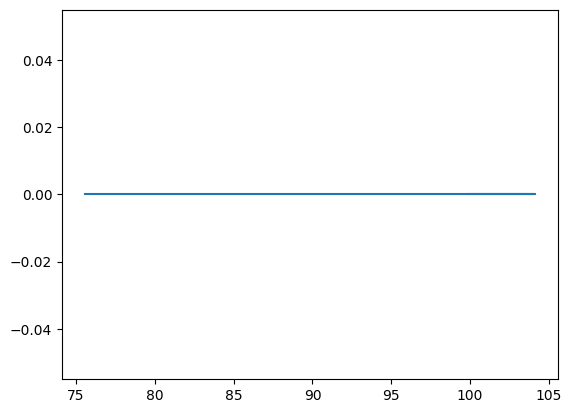

In [6]:
prod = p.z_0-0
j=0
s=1
#plt.plot(mwc_W[p.z_0-1,0,1,:,1],mwc_J[p.z_0-1,0,1,:])
#plt.plot(mwc.w_grid,mwc_n0[p.z_0,0,0,:])
#plt.plot(mwc.w_grid,mwc_W[p.z_0,0,1,:,1])
#plt.plot(mwc_W[p.z_0,0,1,:,1],mwc_n0[p.z_0,0,1,:])
#plt.plot(mwc_W[p.z_0-1,1,1,:,1],mwc_n0[p.z_0-1,1,1,:])
#plt.plot(mwc_Rho_W[p.z_0,0,0,:,5,1],mwc_Rho_n0[p.z_0,0,0,:,5])
plt.plot(mwc_GE_W[prod,j,s,:,0,1],mwc_GE_n0[prod,j,s,:,0])
#plt.plot(mwc_Rho_s_W[prod,j,s,:,0,1],mwc_Rho_s_n0[prod,j,s,:,0])


#Something is very wrong here, for some reason, when the seniors are the "cheapest" (lowest w_grid), the firm doesn't hire???
#Also the top part is still...kinda weird
#Also no hiring at 1 junior, but hiring at 1 senior???

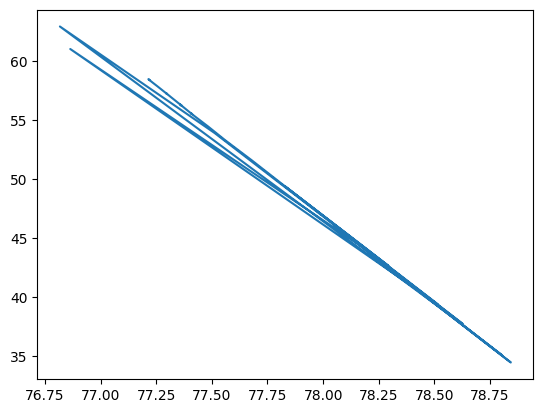

In [16]:
prod = p.z_0-2
j=0
s=3
minv= 165
#plt.plot(mwc_W[p.z_0,j,s,:,1],mwc_J[p.z_0,j,s,:])
#plt.plot(mwc_hmq_W[p.z_0,j,s,:,0,1],mwc_hmq_J[p.z_0,j,s,:,0]-mwc_hmq_J[p.z_0,j-1,s,:,0])
#plt.plot(mwc_Rho_W[p.z_0,j,s,:,0,1],mwc_Rho_J[p.z_0,j,s,:,0]-mwc_Rho_J[p.z_0,j-1,s,:,0])
plt.plot(mwc_GE_W[prod,j,s,minv:,0,1],mwc_GE_J[prod,j,s,minv:,0])
#plt.plot(mwc_Rho_s_W[prod,j,s,:,0,1],mwc_Rho_s_J[prod,j,s,:,0])

#plt.plot(mwc_Rho.w_grid,mwc_Rho_J[prod,j,s,:,0])
#plt.plot(mwc_hmq_W[prod,j,s,:,0,1],mwc_hmq_J[prod,j,s,:,0])
#plt.plot(mwc_Rho_W[p.z_0,j,s,:,0,1],mwc_Rho_n1[p.z_0,j,s,:,0])

In [6]:
from Multiworker_Contract_hire_Rho import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

In [ ]:
mwc_Rho_J = objects['mwc_Rho_J']
mwc_Rho_W = objects['mwc_Rho_W']

profiler = cProfile.Profile()
profiler.enable()
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_pc,mwc_Rho_n0,mwc_Rho_n1)=mwc_Rho.J()
profiler.disable()
# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
#stats.print_stats()

objects['mwc_Rho_J'] = mwc_Rho_J
objects['mwc_Rho_W'] = mwc_Rho_W
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
if results is None:
    mwc_Rho_s_J = objects['mwc_Rho_s_J']
    mwc_Rho_s_W = objects['mwc_Rho_s_W']
else:
    mwc_Rho_s_J = results['J']
    mwc_Rho_s_W = results['W']

(mwc_Rho_s_J,mwc_Rho_s_W,mwc_Rho_s_Rho,mwc_Rho_s_Wstar,mwc_Rho_s_sep,mwc_Rho_s_n0,mwc_Rho_s_n1)=mwc_Rho.J_sep_dir(mwc_Rho_J,mwc_Rho_W)

objects['mwc_Rho_s_J'] = mwc_Rho_s_J
objects['mwc_Rho_s_W'] = mwc_Rho_s_W
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
from Multiworker_Contract_all import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p,cc.js)
(mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n0,mwc_n1)=mwc.J()

In [ ]:
# GE separations
if results is None:
    mwc_GE_s_J = objects['mwc_GE_J']
    mwc_GE_s_W = objects['mwc_GE_W']
else:
    mwc_GE_s_J = results['Ji']
    mwc_GE_s_W = results['W1i']

(mwc_GE_s_J,mwc_GE_s_W,mwc_GE_s_Wstar,mwc_GE_s_sep,mwc_GE_s_n0,mwc_GE_s_n1)=mwc_GE.J_sep_dir(mwc_GE_J,mwc_GE_W,1)

objects['mwc_GE_s_J'] = mwc_GE_s_J
objects['mwc_GE_s_W'] = mwc_GE_s_W
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

# Plots

In [15]:
output_dir = 'Plots'
if not os.path.exists(output_dir):
         os.makedirs(output_dir)

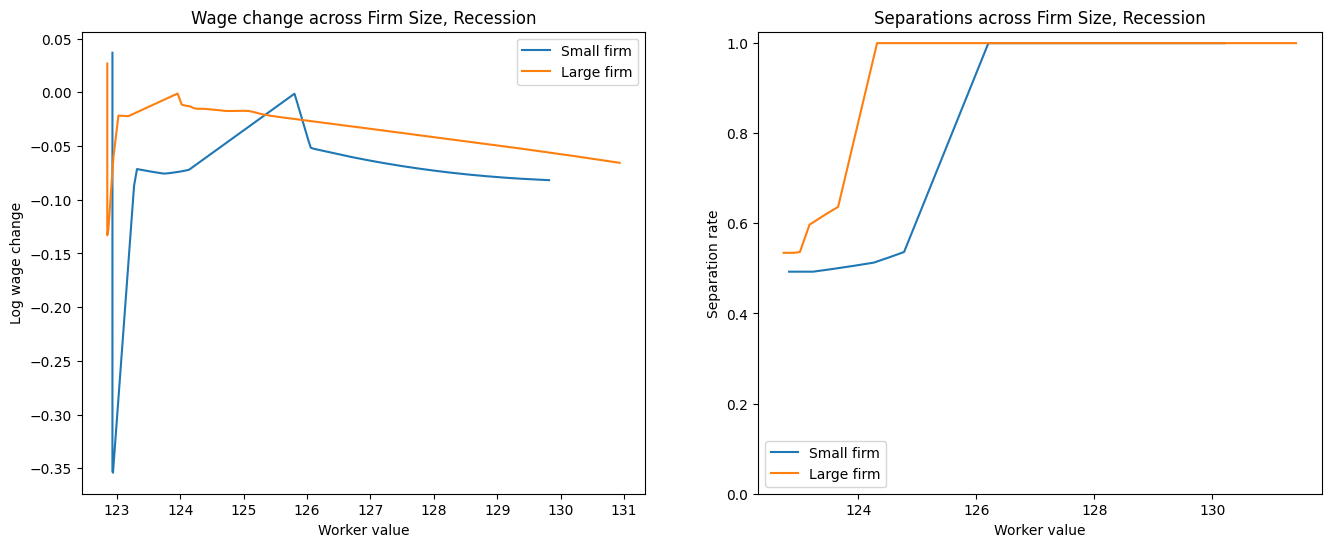

In [16]:
        #THIS IS SOMEHOW THE OPPOSITE??? In firms with many juniors wage drops are larger?? Why?? I guess they don't care for that many seniors?
        #But then why would it equialize afterwards... AHHH BECAUSE ALL THE JUNIORS ARE ALREADY FIRED
        #Now 1,3 places much higher weight on its expensive seniors hencewhy wage drop not that large...? WAGE DROP BOUNCES UP A BIT WHEN THEY START FIRING
        #Still can't understand why 1,1 goes for full firing earlier tho... Also at the same time that complete firing happens, wage drops amplify... guess that makes sense tho
        save=1
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1) 
        # Plot the data
        #plt.plot(mwc_Rho_s_W[0, 1, 1 ,:, 5, 1], mwc_Rho_s_Wstar[0, 1, 1 ,:, 5]-mwc_Rho_s_W[0, 1, 1 ,:, 5, 1], label='Small firm')
        plt.plot(mwc_Rho_s_Wstar[0, 1, 1 ,:, 5], np.log(np.interp(mwc_Rho_s_Wstar[0, 1, 1 ,:, 5],mwc_Rho_s_W[0,1,1,:,5,1],mwc_Rho.w_grid))-np.log(mwc_Rho.w_grid), label='Small firm')
        plt.plot(mwc_Rho_s_Wstar[0, 1, 3 ,:, 5], np.log(np.interp(mwc_Rho_s_Wstar[0, 1, 3 ,:, 5],mwc_Rho_s_W[0,1,3,:,5,1],mwc_Rho.w_grid))-np.log(mwc_Rho.w_grid), label='Large firm')

        #plt.plot(mwc_Rho_s_W[0, 1, 3 ,:, 5, 1], mwc_Rho_s_Wstar[0, 1, 3 ,:, 5]-mwc_Rho_s_W[0, 1, 3 ,:, 5, 1], label='Larger firm')
        #plt.plot(baseline_W[0, 3, 1 ,:, 5, 1], baseline_Wstar[0, 3, 1 ,:, 5]-baseline_W[0, 3, 1 ,:, 5, 1], label='Larger firm wage')
        #if mwc_s_W is not None:
        #    plt.plot(mwc_s_W[p.z_0-1, 0, 1,:, 1], mwc_s_Wstar[p.z_0-1, 0, 1, :]-mwc_s_W[p.z_0-1, 0, 1,:, 1], label='DRS with separations')
        #if mwc_s_dir_W is not None:
        #    plt.plot(mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], mwc_s_dir_Wstar[p.z_0-1, 0, 1, :]-mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], label='DRS with direct separations')
        plt.legend()
        # Add titles and labels
        plt.title('Wage change across Firm Size, Recession')
        plt.xlabel('Worker value')
        plt.ylabel('Log wage change')

        # Secone subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot

        plt.plot(mwc_Rho_s_W[0, 1, 1, :, 0 ,1], mwc_Rho_s_sep[0, 1, 1, :, 0], label='Small firm')
        plt.plot(mwc_Rho_s_W[0, 1, 3, :, 0 ,1], mwc_Rho_s_sep[0, 1, 3, :, 0], label='Large firm')

        plt.legend()
        # Add titles and labels
        plt.title('Separations across Firm Size, Recession')
        plt.xlabel('Worker value')
        plt.ylabel('Separation rate')
        plt.ylim(ymin=0)
        if save==1:
          plt.savefig(os.path.join(output_dir,'Log wage cuts and Separations Across Size.png'), bbox_inches='tight')  # Save as PNG

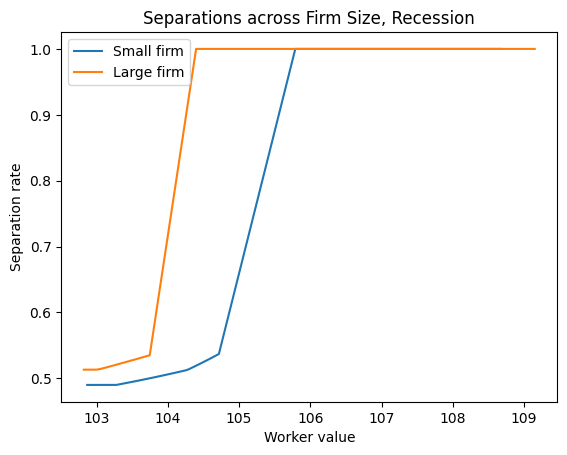

In [28]:

if save==1:
        plt.savefig(os.path.join(output_dir,'Separations Across Size.png'), bbox_inches='tight')  # Save as PNG

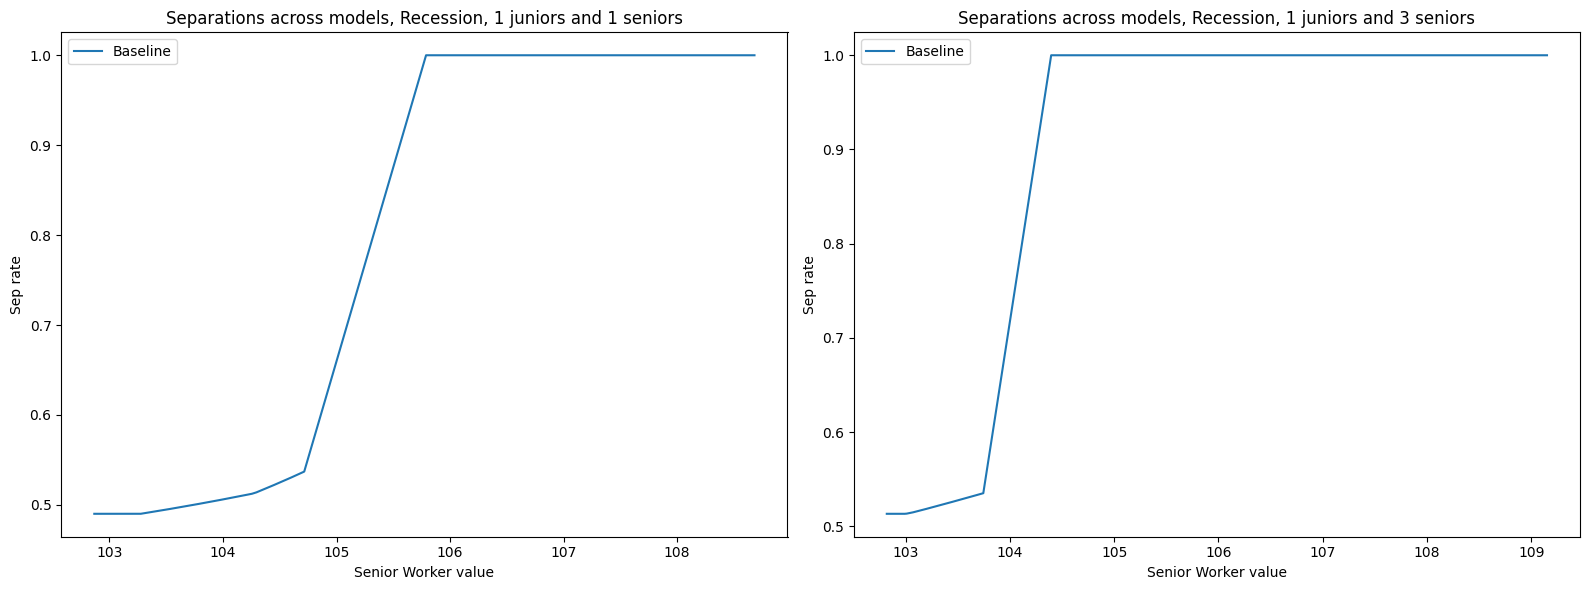

In [14]:
plot_sep(0,0,    1,1,    1,3,    0,  0,0,    0)

In [11]:
def plot_sep(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1

        #plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_sep[prod1, jun, sen, :, qual], label='Baseline')
        plt.plot(mwc_Rho_s_W[prod1, jun, sen, :, qual ,1], mwc_Rho_s_sep[prod1, jun, sen, :, qual], label='Baseline')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2

        #plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_sep[prod2, jun, sen, :, qual], label='Baseline')
        plt.plot(mwc_Rho_s_W[prod2, jun, sen, :, qual ,1], mwc_Rho_s_sep[prod2, jun, sen, :, qual], label='Baseline')
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [7]:
names = [ 'DRS HMQ', 'DRS HMQ via RHO', 'HMQ']

In [ ]:
plts.CRSvsDRSvalue(names,cc_W,cc_J,mwc_hmq_W[...,0,:],mwc_Rho_J[...,0],mwc_Rho_W[...,0,:],mwc_Rho_J[...,0],None,None,0)

In [9]:
def plot_GE(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
       
        plt.plot(mwc_GE_W[prod1, jun, sen, :, qual ,1], mwc_GE_J[prod1, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_J[prod1, jun, sen, :, qual], label='With separations')


     

        if prod1 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        plt.plot(mwc_GE_W[prod2, jun, sen, :, qual ,1], mwc_GE_J[prod2, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_J[prod2, jun, sen, :, qual], label='With separations')

       
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'General Equilibrium Value Function.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
plot_GE(2,0,    1,2,    1,1,    0,  0,0,    0)

In [6]:
baseline_sep = objects['baseline_sep']
baseline_W = objects['baseline_W']
baseline_Wstar = objects['baseline_Wstar']


noHMQ_sep = objects['noHMQ_sep']
noHMQ_W = objects['noHMQ_W']
noHMQ_Wstar = objects['noHMQ_Wstar']
nohire_sep = objects['nohire_sep']
nohire_W = objects['nohire_W']
nohire_Wstar = objects['nohire_W']
hiresub_sep = objects['hiresub_sep']
hiresub_W = objects['hiresub_W']
hiresub_Wstar = objects['hiresub_Wstar']

In [7]:
import os
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
def plott(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
        if baseline_W is not None:        
            plt.plot(baseline_W[prod1, jun, sen, 5:50, qual ,1], baseline_sep[prod1, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod1, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod1, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod1, jun, sen, 5:50, qual ,1], nohire_sep[prod1, jun, sen, 5:50, qual], label='CRS') #Not true CRS but still
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod1, jun, sen, 5:50, qual, 1], noHMQ_sep[prod1, jun, sen, 5:50, qual], label='No match heterog')
        #if minwage_W is not None: 
        # if minwage ==1: 
        #  plt.plot(minwage_W[prod1, jun, sen, 5:50, qual, 1], minwage_sep[prod1, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod1, jun, sen, 5:50, qual, 1], hiresub_sep[prod1, jun, sen, 5:50, qual], label='Hiring subsidy')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, jun, sen, 5:50, qual, 1], baseline_sep[prod2, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod2, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod2, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod2, jun, sen, 5:50, qual, 1], nohire_sep[prod2, jun, sen, 5:50, qual], label='CRS')  
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod2, jun, sen, 5:50, qual, 1], noHMQ_sep[prod2, jun, sen, 5:50, qual], label='No match heterog')     
        #if minwage_W is not None:
        # if minwage == 1:  
        #  plt.plot(minwage_W[prod2, jun, sen, 5:50, qual, 1], minwage_sep[prod2, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod2, jun, sen, 5:50, qual, 1], hiresub_sep[prod2, jun, sen, 5:50, qual], label='Hiring subsidy')            
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
plott(0,0,  1,3,    2,2,    5,0,0,save=0)

In [ ]:
plott(0,0,  1,1,    1,3,    5, 0,0, save=0)

In [ ]:
        prod2=0
        save=1
        qual = 5
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 1, 5:, qual, 1], baseline_sep[prod2, 1, 1, 5:, qual], label='Small firm')
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Larger firm')  
        #if baseline_W is not None:        
        
        #plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Many seniors')     
         
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across size, Boom')
        elif prod2 == 0:
          plt.title(f'Separations across size, Recession')
        else:
          plt.title(f'Separations across size, {prod} productivity')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations across size new.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
#This is no DRS/hiring. Even less firing than no HMQ

plts.sep(0,p.z_0,1,3,1,3,None,None,noHMQ_W[...,1,:],noHMQ_sep[...,1])

In [ ]:
plts.CRSvsDRSpolicy(cc_W,cc_Wstar,baseline_W[...,0,:],baseline_Wstar[...,0],nohire_W[...,0,:],baseline_Wstar[...,0],None,None,0)

In [ ]:
plts.CRSvsDRSdirect(cc_J,mwc_J,0)

In [ ]:
plts.CRSvsDRSsurplus(cc_J,cc_W,mwc_J,mwc_W,0)

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
            #something like: sep_star = interp(0,foc_sep,sep_grid) + extra conditions
            #need derivatives of future expectations!
            # for that, I interpolate onto rho_star,n0_star, and one of n1_s/q_s. If I'm looking for derivative wrt size, I interpolate onto q_s and THEN take the difference between two discrete values
            #n1_s[iz,in0,in1,iv,iq,s] = (N_grid[in0]*(1-sep_grid[s])+N_grid1[in1]) * pc_temp[iz,in0,in1,iv] #Gives me sep for every damn value hell yeah
            #n1_s_ceil = np.ceil(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #n1_s_floor = np.floor(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #J_n1[iz,...,s,in11] = RegularGridInterpolator((N_grid, rho_grid, Q_grid), EJpi[iz, :, in11, ...], bounds_error=False, fill_value=None) ((n0_star[iz, ...], rho_star[iz, ...], q_s[iz, ...,s]))
            #J_fut_deriv_n[...,s] = (J_n1[...,s,n1_s_ceil[...,s]] - J_n1[...,s,n1_s_floor[...,s]] ) / (N_grid1[n1_s_ceil[...,s]] - N_grid1[n1_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (n1_s_ceil==0), last_bound = (N_grid1[n1_s_floor]==n_bar)
            #J_fut_deriv_n[first_bound] = (J_n1[first_bound,1] - J_n1[first_bound,0] ) / (N_grid1[1] - N_grid1[0])
            #J_fut_deriv_n[last_bound] = (J_n1[last_bound,-1] - J_n1[last_bound,-2] ) / (N_grid1[-1] - N_grid1[-2])
 
            #q_s = (N_grid[self.grid[1]] * (self.p.q_0 - np.max(sep_grid[s]-( 1- self.p.q_0),0))+Q_grid[self.grid[4]]*N_grid1[self.grid[2]]) / (N_grid[self.grid[1]]*(1-sep_grid[s])+N_grid1[self.grid[2]])
            #J_q[iz,...,s,iqq] = RegularGridInterpolator((N_grid, N_grid1, rho_grid), EJpi[iz, ..., iqq], bounds_error=False, fill_value=None) ((n0_star[iz, ...], n1_s[iz,...,s], rho_star[iz, ...]))
            #J_fut_deriv_q[...,s] = (J_q[...,s,q_s_ceil[...,s]] - J_n1  [...,s,q_s_floor[...,s]] ) / (Q_grid[q_s_ceil[...,s]] - Q_grid[q_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (q_s_ceil==0), last_bound = (Q_grid[q_s_floor]=1.0)
            #J_fut_deriv_q[first_bound] = (J_q[first_bound,1] - J_q[first_bound,0] ) / (Q_grid1[1] - Q_grid1[0])
            #J_fut_deriv_q[last_bound] = (J_q[last_bound,-1] - J_q[last_bound,-2] ) / (Q_grid1[-1] - Q_grid1[-2])
            #q_deriv_s = N_grid[grid[1]] * q_s / (N_grid1[grid[2]]+(1-sep_grid[s])*N_grid[grid[1]]) #Probably need to loop over s. Not efficient, but simpler than redoing the whole self.grid thing
            #worker_fut_value = interp ( rho_star,rho_grid,re+EW1i)                    #This is because we don't yet have the worker future value yet. OR just use EW1_star and re_star??? a little risky but possible.
            #Could be a good start
            #foc_sep[...,s] = - J_fut_deriv[...,s] * pc_temp + J_fut_deriv_q * q_deriv_s - (re+EW1i - EUi) / self.pref.inv_utility_1d(self.v_0-self.p.beta*(s_grid[s] * EUi + (1-s_grid[s]) * (EW1_star + re_star)
            # sep_neg = np.all (foc <= 0, axis = -1)
            # sep_max = np.all (foc > 0, axis = -1)
            # sep_star[sep_neg] = 0
            # sep_star[sep_max] = 1.0 #OH SHIT WHAT IF THE Q IS ALREADY AT ITS MAX? I think this should account for it, no?
            #sep_star = interp_multidim(0,-impose_decreasing(foc_sep),sep_grid) 